In [1]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  after removing the cwd from sys.path.


### Inference for Regression ###

+ 지금까지 변수 간의 관계에 대한 분석은 순전히 설명적이었다. 
 - 산점도가 주어지면 가장 좋은 회귀직선(즉, 가장 작은 평균 제곱 오차)을 계산하였다. 

+ 그러나 우리가 가진 데이터가 아주 큰 모집단으로부터 얻어진 sample집단이라면 어떻게 해석해야 할까? 
 - 그냥 sample data로부터 구한 회귀직선을 구하고 이를 모집단에 대해서도 동일하다고 결론을 지으면 되는걸까? 그리고 예측에 그대로 활용할 것인가?

+ 예를들면, 신생아체중과 임신일수의 산포도는 표본에서의 두 변수 사이의 정확한 관계를 보여주지만 모집단의 모든 아기들 또는 일반적으로 아기들 사이의 관계가 동일하게 사실(혹은 거의 사실)인지 궁금할 수 있다.

+ 지금까지 그랬듯이, 데이터에 대한 가정을 신중하게 조사해야 한다.
 - *models* : Sets of assumptions
 - *regression models* :   Sets of assumptions about randomness in roughly linear scatter plots

In [0]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

### A Regression Model ###

- Regression model에서 우리는 두 변수 사이의 완벽한 기저관계(underlying relation)은 완전한 선형(linear)이기를 기대한다. 
 + 이 때, 이 완전한 선형 직선을 *signal*이라 하며 우리가 찾아내기를 원하는 대상이다.
 + 그러나 우리가 관찰하는 데이터는 완벽한 선형이 아니면 *signal*에 *random noise*이 더해진 것이다. 
 + 따라서 signal로부터 noise를 적절하게 분리해 내는 것이 필요하다.

- scatter plot이 다음과 같이 random하게 생성되어 regression model을 적용한다고 생각해 보자.

 + 두 변수 $x$, $y$ 사이의 관계는 완전히 선형이지만 우리는 그것을 알지 못한다. 
 + 그 선 위 점들을 수직으로 다음과 같이 이동시킨 scatter plot이 생성된다. 
    - 각 $x$에 대하여 true line위의 $y$값(signal)을 찾고 noise (혹은 error)를 생성한다. 
    - error는 평균이 0인 정규분포로부터 뽑힌 error집합에서 random하기 고른다 (with replacement).
    - 생성되는 point는 $x$값과 "signal + error"이다. 
 + 마지막으로 ture line을 지우고 생성된 점들만을 표시하자. 

- 이 산점도를 바탕으로 true line을 어떻게 추정해야 할까? 산점도를 통과하는 가장 좋은 선은 regression line이므로 그것이 true line의 자연스런 추정치가 될 수 있다. 

- 아래 시뮬레이션은 regression line이 true line과 얼마나 가까운 지 보여준다.
 + 첫 번째 패널은 true line에서 산점도를 생성하는 방법을 보여준다.
 + 두 번째는 우리가 보는 산점도를 보여준다.
 + 세 번째는 산점도를 통한 regression line을 보여준다.
 + 네 번째는 regression line과 true line을 모두 보여준다.

- 편의를 위해 true line의 기울기, true line의 절편, 샘플 크기의 세 가지 인자로 호출되는 'draw_and_compare'함수를 구현하였다.

- 다양한 인자를 가지고 여러 번 시뮬레이션을 수행해 보자. 샘플 크기가 커지면 true line에 보다 가까운 regression line이 구해질 것이다. 

In [0]:

def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    eps = np.random.normal(0, 6, sample_size)
    y = (true_slope*x + true_int) + eps
    tyche = Table().with_columns(
        'x', x,
        'y', y
    )

    plots.figure(figsize=(6, 16))
    plots.subplot(4, 1, 1)
    plots.scatter(tyche['x'], tyche['y'], s=20)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    plots.subplot(4, 1, 2)
    plots.scatter(tyche['x'],tyche['y'], s=20)
    plots.title('What We Get to See')

    plots.subplot(4, 1, 3)
    scatter_fit(tyche, 'x', 'y')
    plots.xlabel("")
    plots.ylabel("")
    plots.title('Regression Line: Estimate of True Line')

    plots.subplot(4, 1, 4)
    scatter_fit(tyche, 'x', 'y')
    plots.ylabel("")
    xlims = np.array([np.min(tyche['x']), np.max(tyche['x'])])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

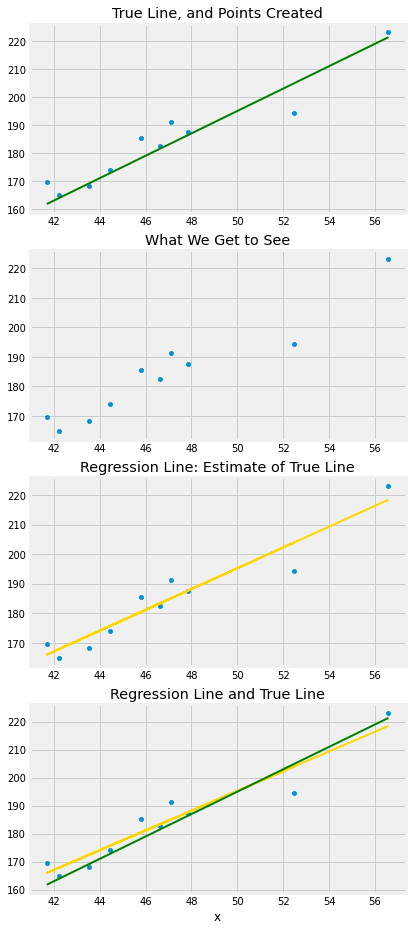

In [4]:
# The true line,
# the points created,
# and our estimate of the true line.
# Arguments: true slope, true intercept, number of points

draw_and_compare(4, -5, 10)

- 물론 실제로 우리는 true line을 보지 못한다. 시뮬레이션 결과에 따르면 회귀 모형이 그럴듯해 보이며 큰 표본이 있는 경우 regression line은 true line에 대한 근사치이다.

In [0]:

baby = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/baby.csv')

### Inference for the True Slope ###

- 신생아 데이터를 사용하여 true line의 기울기를 추정하는 방법을 살펴보자.


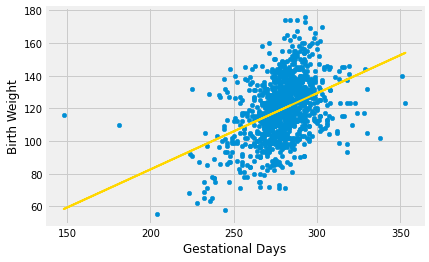

In [6]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')

In [7]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.40754279338885108

- correlation은 0.4이므로 기울기는 양수(positive)이다. 
- 이것이 true line도 양수 기울기를 가진다는 의미인가? 
 + 이 질문의 답으로서 위 sample에 대한 regression line의 기울기(0.47 ounces per day)를 사용할 수 있다.

In [8]:
slope(baby, 'Gestational Days', 'Birth Weight')

0.46655687694921522

- 그러나 산점도가 다르게 나왔으면 regression line이 다르고 기울기가 다를 수 있을 텐데 기울기가 얼마나 다른지 어떻게 알 수 있을까?

- 새로운 산점도를 통해 regression line을 그리고 기울기를 찾으려면 또다른 샘플이 필요한데 어떻게 얻을 수 있을까?

- 원래 샘플을 *boostrap*할 수 있다. 

### Bootstrapping the Scatter Plot ###
> *bootstrapped scatter plot* 의 생성

- random sampling with replacement from the original sample
- as many times as the original sample size

- 다음은 original scatter plot과 4번의 bootstrapped scatter plot을 보여주는 예이다. 

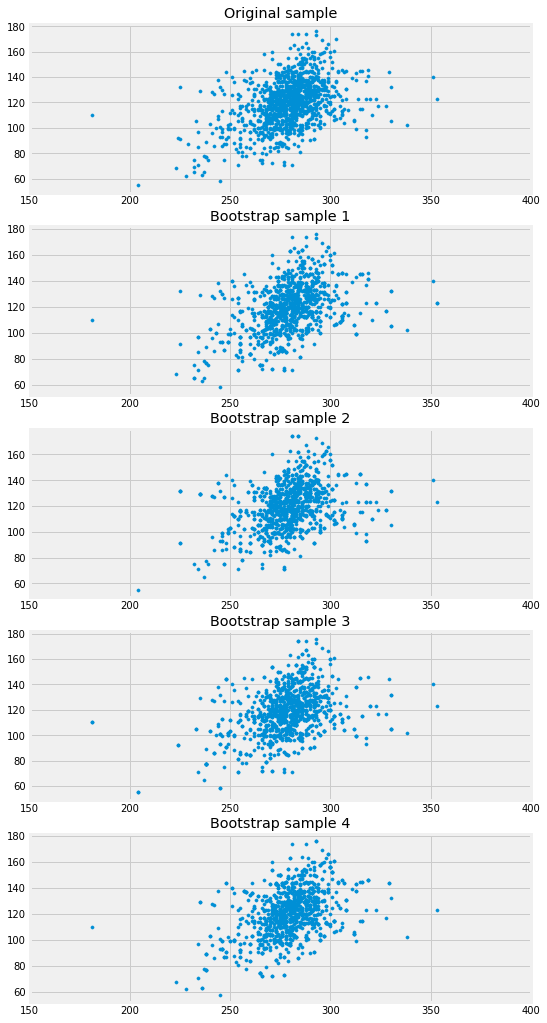

In [9]:

plots.figure(figsize=(8, 18))
plots.subplot(5, 1, 1)
plots.scatter(baby[1], baby[0], s=10)
plots.xlim([150, 400])
plots.title('Original sample')

for i in np.arange(1, 5, 1):
    plots.subplot(5,1,i+1)
    rep = baby.sample(with_replacement=True)
    plots.scatter(rep[1], rep[0], s=10)
    plots.xlim([150, 400])
    plots.title('Bootstrap sample '+str(i))

### Estimating the True Slope ###

- 아주 많은 bootstrapping을 통해 각각 regression line을 찾고 slope를 구해보자. - 그리고 그들의 empirical histogram을 그려보자. 


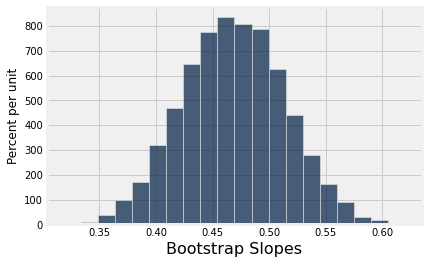

In [10]:
slopes = make_array()
for i in np.arange(5000):
    bootstrap_sample = baby.sample()
    bootstrap_slope = slope(bootstrap_sample, 'Gestational Days', 'Birth Weight')
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

- 그리고 true line의 slope에 대한 95% confidence interval(신뢰구간)을 구해보자.

In [11]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(0.3793684812116016, 0.55790686415113289)

### A Function to Bootstrap the Slope ###

위 방법을 구현하여 다음 함수로 구현해 보자.
- `bootstrap_slope` 
 + table : table 이름 
 + x : predictor 변수
 + y : response 변수
 + repetitions : bootstrap 반복 횟수 

In [0]:
def bootstrap_slope(table, x, y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)

- 앞서 문제에 대해 `bootstrap_slope`을 적용한 결과를 살펴보자. 

Slope of regression line: 0.466556876949
Approximate 95%-confidence interval for the true slope:
0.380451731494 0.559545114946


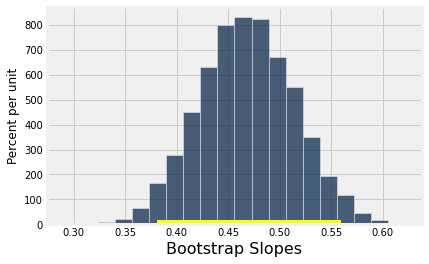

In [13]:
bootstrap_slope(baby, 'Gestational Days', 'Birth Weight', 5000)

- 다른 문제에 대해서도 적용해 보자.
 + predictor 변수 : birth weight
 + response 변수 : modther's height
 + correlation이 작은 경우이다. (0.2)

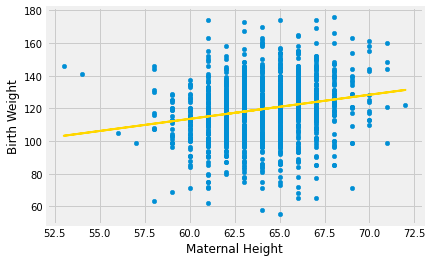

In [14]:
scatter_fit(baby, 'Maternal Height', 'Birth Weight')

In [15]:
correlation(baby, 'Maternal Height', 'Birth Weight')

0.20370417718968034

Slope of regression line: 1.47801935193
Approximate 95%-confidence interval for the true slope:
1.03790516204 1.90852889542


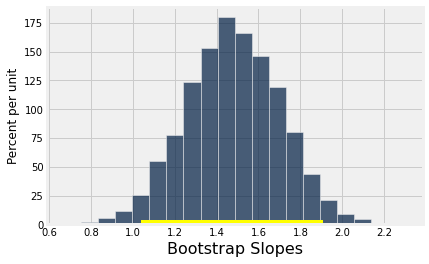

In [16]:
bootstrap_slope(baby, 'Maternal Height', 'Birth Weight', 5000)

- 위와 같이 true line의 slope에 대한 95% confidence interval을 추정할 수 있다. 

### Could the True Slope Be 0? ###

데이터가 회귀 모델을 따르고 regression line으로 true line을 추정한다고 가정하면 거의 항상 regression line이 완벽하게 평평하지 않으면 산점도에서 선형 관계가 관찰된다.

그러나 그 관찰이 가짜라면 어떨까? 다시 말해서, true line이 평평한 경우, 즉 두 변수 사이에 선형 관계가 없다면, 우리가 관찰한 연관성은 표본을 구성하는 점을 생성하는 무작위성 때문일까?

이 문제가 발생하는 이유를 설명하는 시뮬레이션을 위해 ``draw_and_compare`` 을 호출해 보자. 이 때 true line의 기울기가 0이어야 한다. 

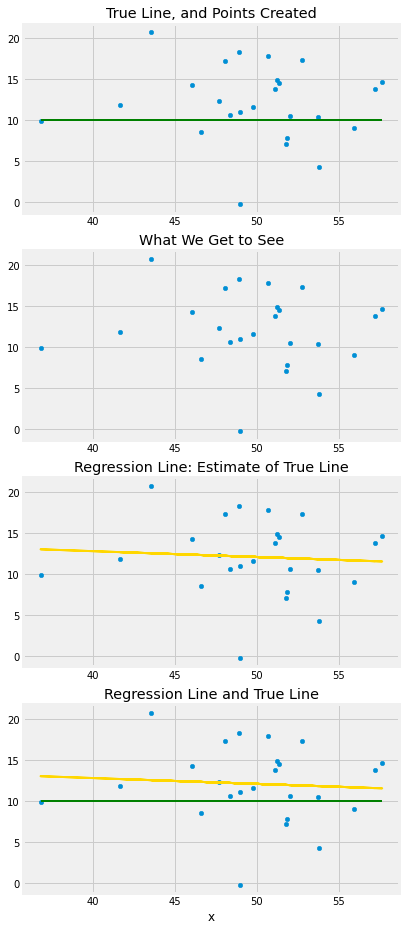

In [17]:
draw_and_compare(0, 10, 25)

True line의 기울기를 0으로 유지하면서 시뮬레이션을 여러 번 실행해 보면 regression line의 기울기는 일반적으로 0이 아니다. 때때로 위쪽으로, 혹은 아래쪽으로 기울어지면서 매번 두 변수가 서로 관련되어 있다는 잘못된 인상을 준다.

이에 대한 검정을 다음과 같이 실시할 수 있다. 

**Null Hypothesis.** The slope of the true line is 0. 

**Alternative Hypothesis.** The slope of the true line is not 0. 

앞서 신뢰구간 추정을 해 보았으므로 신뢰구간에 0이 포함되는지를 확인해 보면 된다. 
즉, 만일 포함되지 않는다면 귀무가설을 reject한다 (with 5% cutoff for the P-value). 

만일 포함한다면 우리는 귀무가설을 reject할 충분한 근거가 없다. (관찰한 slope는 거짓일 것 같다.) 

- 다음 예에 대해서 테스트해 보자. 

In [18]:
slope(baby, 'Maternal Age', 'Birth Weight')

0.085007669415825132

- 기울기가 양수이지만 매우 작다. 

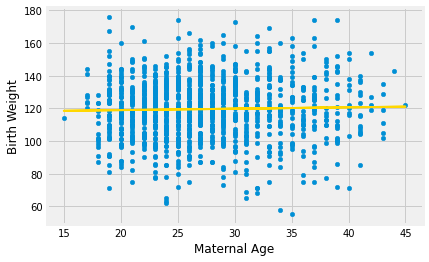

In [19]:
scatter_fit(baby, 'Maternal Age', 'Birth Weight')

`bootstrap_slope` 함수를 통해 real line의 slope에 관한 95% bootstrap confidence interval을 구해 0이 포함되는지 살펴보자. 

Slope of regression line: 0.0850076694158
Approximate 95%-confidence interval for the true slope:
-0.102463558349 0.269986535439


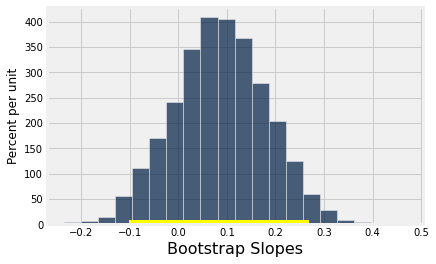

In [20]:
bootstrap_slope(baby, 'Maternal Age', 'Birth Weight', 5000)

0이 포함되므로 귀무가설을 reject하지 못한다. 다시 말해 '산모의 나이'를 통해 '신생아의 몸무게'를 선형 모델로 예측하는 것은 합리적이지 않다. 

### Prediction Intervals ###
회귀의 주요 용도 중 하나는 원래 표본에 없던 새로운 표본에 대해 예측하는 것이다. 

추정치는 주어진 $x$에서 실제 true line의 높이이다. 물론 true line을 모르기 때문에 regression line을 활용하는 것이다. 

주어진 $x$ 값의 **fitted value (적합값)**은 $x$ 값을 기준으로 $y$의 회귀 추정값, 다시 말해 regression line의 높이입니다.

임신일 수에 따라 아기의 출생 체중을 예측한다고 가정하자.
(앞서 보였듯이 true line의 기울기에 대한 95 % 신뢰 구간에는 0이 포함되지 않으므로 예측을 수행하는 것이 합리적이다.)

다음 그림을 살펴보자.
이 때, red line은 $x = 300$이다.

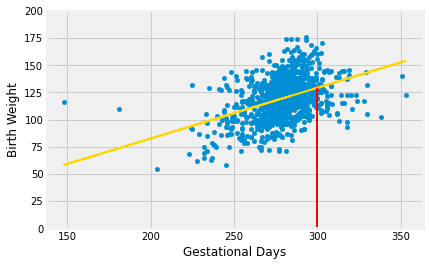

In [21]:

scatter_fit(baby, 'Gestational Days', 'Birth Weight')
s = slope(baby, 'Gestational Days', 'Birth Weight')
i = intercept(baby, 'Gestational Days', 'Birth Weight')
fit_300 = s*300 + i
plots.scatter(300, fit_300, color='red', s=20)
plots.plot([300,300], [0, fit_300], color='red', lw=2)
plots.ylim([0, 200]);

빨간색 선이 회귀선에 닿는 지점의 높이는 임신일수 300일에 적합된 값이다. 

다음 'fitted_value'함수는 이 높이를 계산한다. 'correlation', 'slope'및 'intercept'함수와 마찬가지로 인수에는 테이블 이름과 $x$ 및 $y$ 열의 레이블이 포함되고 추가로 네 번째 인수인 주어진 $x$ 값입니다.

In [0]:
def fitted_value(table, x, y, given_x):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x  + b

위 예제에 대해서 적용한 결과는 다음과 같다. 
(약 129.2 ounces)

In [23]:
fit_300 = fitted_value(baby, 'Gestational Days', 'Birth Weight', 300)
fit_300

129.2129241703143

### The Variability of the Prediction ###


- 우리는 표본의 데이터를 사용하여 임신일수에 따라 새로운 아기의 출생 체중을 한 번 예측하는 방법을 살펴보았다. 
- 그러나 표본이 다르면 회귀선도 달라지고 예측도 마찬가지이다. 
- 예측이 얼마나 좋은지 알기 위해서는 예측이 얼마나 변수가 될 수 있는지 알아야한다.

- 이를 위해 bootstrap하여 새 샘플을 생성하고 새로운 예측을 하면 된다.
- 아래 그림은 10번 boostrapped sample을 통해 구한 regression line과 임신일수 300일에 해당하는 예상 출생 체중을 보여줍니다.

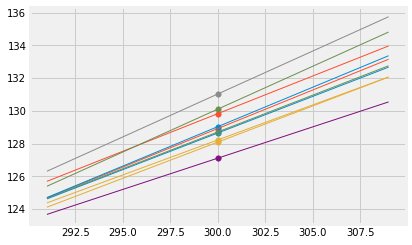

In [24]:
# HIDDEN 

x = 300

lines = Table(['slope','intercept'])
for i in range(10):
    rep = baby.sample(with_replacement=True)
    a = slope(rep, 'Gestational Days', 'Birth Weight')
    b = intercept(rep, 'Gestational Days', 'Birth Weight')
    lines.append([a, b])

lines['prediction at x='+str(x)] = lines.column('slope')*x + lines.column('intercept')

xlims = np.array([291, 309])
left = xlims[0]*lines[0] + lines[1]
right = xlims[1]*lines[0] + lines[1]
fit_x = x*lines['slope'] + lines['intercept']

for i in range(10):
    plots.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plots.scatter(x, fit_x[i], s=30)

예측값은 달라진다.
- 아래 표 참조


In [25]:
lines

slope,intercept,prediction at x=300
0.446974,-5.44915,128.643
0.470185,-12.1386,128.917
0.441554,-4.37887,128.087
0.449115,-6.02628,128.708
0.524157,-26.2202,131.027
0.38163,12.6191,127.108
0.481175,-15.3202,129.032
0.459343,-7.97677,129.826
0.427278,0.0373273,128.221
0.523233,-26.8685,130.101


### Bootstrap Prediction Interval ###

앞서 slope의 추정과 같이 empirical hisogram을 만들어 bootstrap confidence interval을 추정할 수 있다.

이를 위해 다음과 같이 ``bootstrap_prediction ''이라는 함수를 정의하자. 
- table : 테이블 이름
- x and y : 예측 변수 및 반응 변수의 열 레이블 (순서대로)
- new_x : 예측할 $x$의 값
- repetitions : 원하는 부트 스트랩 반복 횟수

각 반복에서 함수는 원래 산점도를 bootstrap하고 지정된 $x$ 값을 기반으로 예측된 $y$ 값을 찾는다 ('fitted_value'함수 활용) 

마지막으로 모든 예측된 값의 empirical histogram을 그리고 예측된 값의 95% confidence interval을 출력한다.

In [0]:
# Bootstrap prediction of variable y at new_x
# Data contained in table; prediction by regression of y based on x
# repetitions = number of bootstrap replications of the original scatter plot

def bootstrap_prediction(table, x, y, new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x; 
    # augment the predictions list
    predictions = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_prediction = fitted_value(bootstrap_sample, x, y, new_x)
        predictions = np.append(predictions, bootstrap_prediction)
        
    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)
    
    # Prediction based on original sample
    original = fitted_value(table, x, y, new_x)
    
    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Height of regression line at x='+str(new_x)+':', original)
    print('Approximate 95%-confidence interval:')
    print(left, right)

Height of regression line at x=300: 129.21292417
Approximate 95%-confidence interval:
127.357992238 131.347048748


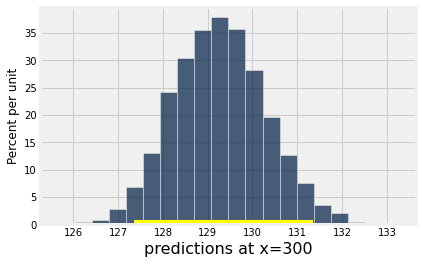

In [27]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 300, 5000)

위의 그림은 5,000 회 boostrapping을 통해 임신일수 300일인 경우 아기의 예상 출생 체중에 대한 empirical histogram을 보여주며 정규 분포에 가깝다. 

대략 95%신뢰 예측구간은 약 127 부터  약 131의 범위이다. 최초 샘플에 기초한 예측은 약 129였으며, 이는 간격의 중심에 가깝다.

### The Effect of Changing the Value of the Predictor ###

- 아래 그림은 임신일수가 285일 때 5,000번 bootstrap prediction의 empirical histogram이다. 
- original sample에 대한 regression line에 의한 예측값은 약 122 ounce이고, interval 범위는 약 121 ounce에서 123 ounce이다.  

Height of regression line at x=285: 122.214571016
Approximate 95%-confidence interval:
121.15916531 123.256415484


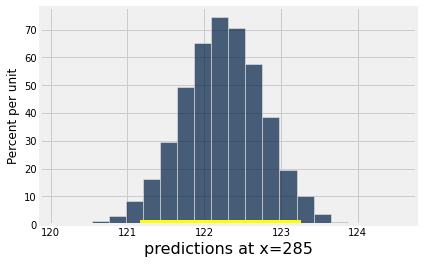

In [28]:
bootstrap_prediction(baby, 'Gestational Days', 'Birth Weight', 285, 5000)

이러한 interval은 임신일수 300일인 경우의 prediction interval보다 더 좁은데 그 이유를 생각해 보자. 

평균 임신일수는 279일 이었음을 생각해 보자. 

In [29]:
np.mean(baby.column('Gestational Days'))

279.10136286201021

285는 300보다 분포의 중심에 더 가깝다. 전형적으로 bootstrap 샘플에 기초한 regression line은 예측 변수의 분포 중심 근처에서 서로 더 가깝다. 따라서 모든 예측 된 값이 서로 더 가까우며 이는 예측 간격의 좁은 폭을 설명한다.

아래 그림에서 10 개의 부트 스트랩 복제 각각에 대한 $ x = 285 $ 및 $ x = 300 $의 예측을 보여준다. 일반적으로 선은 $ x = 285 $보다 $ x = 300 $에서 멀리 떨어져 있으므로 $ x = 300 $의 예측은 더 다양합니다.

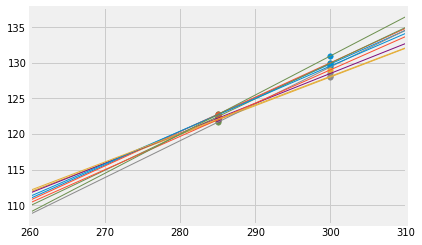

In [30]:

x1 = 300
x2 = 285

lines = Table(['slope','intercept'])
for i in range(10):
    rep = baby.sample(with_replacement=True)
    a = slope(rep, 'Gestational Days', 'Birth Weight')
    b = intercept(rep, 'Gestational Days', 'Birth Weight')
    lines.append([a, b])

xlims = np.array([260, 310])
left = xlims[0]*lines[0] + lines[1]
right = xlims[1]*lines[0] + lines[1]
fit_x1 = x1*lines['slope'] + lines['intercept']
fit_x2 = x2*lines['slope'] + lines['intercept']

plots.xlim(xlims)
for i in range(10):
    plots.plot(xlims, np.array([left[i], right[i]]), lw=1)
    plots.scatter(x1, fit_x1[i], s=30)
    plots.scatter(x2, fit_x2[i], s=30)

### Words of caution ###

이 장에서 수행한 모든 예측 및 테스트는 회귀 모형이 유지한다고 가정한다. 특히, 이 방법은 산점도가 직선(real line)상의 점으로 시작한 다음 임의의 일반 error를 추가하여 선에서 수직방향으로 밀어내어 생성된 점과 유사하다고 가정한다.

산점도가 그렇게 보이지 않으면 모델이 데이터에 대해서 유효하지 않다는 것이며 모형이 참이라고 가정하는 계산 역시 유효하지 않다.

따라서 모델을 기반으로 예측을 시작하거나 모델의 매개 변수에 대한 가설을 테스트하기 전에 먼저 회귀 모델이 데이터와 잘 어울리는지 판단해야 한다. 간단한 방법은 이 장에서 수행했듯이 두 변수의 산포도를 그리고 대략 선형으로 보이고 선 주위에 고르게 퍼져 있는지 확인하는 것입니다. 혹은 15장에에서 했듯이 잔차(residual) 그림을 사용하여 진단을 실행할 필요도 있다. 